## Section 1.7 More Examples on Data Aggregation
## 03 February 2022

In [ ]:
"""
Agenda: 
Data Aggregation functions 
"""

#### (1) Pivot_table function

#### Import data

In [ ]:
#df.pivot_table(['int_age'],index = [df.iloc[:,meet_friends], df.iloc[:,friendsgiving]])

In [15]:
data = {"Bank": ["CRDB", "CRDB", "CRDB", "CRDB", "CRDB", "CRDB", "NMB", "NMB", "NMB", "NMB", "NMB", "NMB"],
"Classification": ["Current", "Current", "Substandard", "Substandard", "Substandard", "Loss", "ESM", "Loss", "Doubtful", "ESM", "ESM", "Current"],
"Age": [24, 28, 40, 22, 29, 33, 31, 26, 21, 36, 25, 31],
"Amount": [3424, 54328, 4034, 34522, 3529, 3433, 34531, 23556, 2441, 3356, 325, 4531]}
df = pd.DataFrame(data)
#df = pd.DataFrame(data, columns=['Bank', 'Classification','Age','Amount'])
print(df)

    Bank Classification  Age  Amount
0   CRDB        Current   24    3424
1   CRDB        Current   28   54328
2   CRDB    Substandard   40    4034
3   CRDB    Substandard   22   34522
4   CRDB    Substandard   29    3529
5   CRDB           Loss   33    3433
6    NMB            ESM   31   34531
7    NMB           Loss   26   23556
8    NMB       Doubtful   21    2441
9    NMB            ESM   36    3356
10   NMB            ESM   25     325
11   NMB        Current   31    4531


#### Simple pivot function

In [16]:
df.pivot_table(index='Classification', columns='Bank')  

Age                   Amount              
Bank                 CRDB        NMB          CRDB           NMB
Classification                                                  
Current         26.000000  31.000000  28876.000000   4531.000000
Doubtful              NaN  21.000000           NaN   2441.000000
ESM                   NaN  30.666667           NaN  12737.333333
Loss            33.000000  26.000000   3433.000000  23556.000000
Substandard     30.333333        NaN  14028.333333           NaN

#### Filter values

In [17]:
df.pivot_table(index='Bank', columns='Classification', values='Amount')

Classification,Current,Doubtful,ESM,Loss,Substandard
Bank,,,,,
CRDB,28876.0,NaN,NaN,3433.0,14028.333333
NMB,4531.0,2441.0,12737.333333,23556.0,NaN


In [18]:
df.pivot_table(index='Bank', columns='Classification', values='Age')

Classification,Current,Doubtful,ESM,Loss,Substandard
Bank,,,,,
CRDB,26.0,NaN,NaN,33.0,30.333333
NMB,31.0,21.0,30.666667,26.0,NaN


#### Adding precision

In [24]:
df.pivot_table(index='Bank', columns='Classification', values='Age').round(3)

Classification,Current,Doubtful,ESM,Loss,Substandard
Bank,,,,,
CRDB,26.0,NaN,NaN,33.0,30.333
NMB,31.0,21.0,30.667,26.0,NaN


In [25]:
df.pivot_table(index='Bank', columns='Classification', values='Age').round(2)

Classification,Current,Doubtful,ESM,Loss,Substandard
Bank,,,,,
CRDB,26.0,NaN,NaN,33.0,30.33
NMB,31.0,21.0,30.67,26.0,NaN


In [26]:
df.pivot_table(index='Bank', columns='Classification', values='Age').round(0)

Classification,Current,Doubtful,ESM,Loss,Substandard
Bank,,,,,
CRDB,26.0,NaN,NaN,33.0,30.0
NMB,31.0,21.0,31.0,26.0,NaN


In [27]:
df.pivot_table(index='Bank', columns='Classification', values='Age').round()

Classification,Current,Doubtful,ESM,Loss,Substandard
Bank,,,,,
CRDB,26.0,NaN,NaN,33.0,30.0
NMB,31.0,21.0,31.0,26.0,NaN


#### Adding format

In [34]:
#formatting 
df2 = df.pivot_table(index='Bank', columns='Classification', values='Age')

df2.style.format({
    'Current': '{:,.0f}'.format,
    'Doubtful': '{:,.0f}'.format,
    'ESM': '{:,.0f}'.format,
    'Loss': '{:,.0f}'.format,
    'Substandard': '{:,.0f}'.format,
}) 

Classification,Current,Doubtful,ESM,Loss,Substandard
Bank,,,,,
CRDB,26,nan,nan,33,30
NMB,31,21,31,26,nan


In [36]:
#formatting 
df2 = df.pivot_table(index='Bank', columns='Classification', values='Amount')

df2.style.format({
    'Current': '{:,.2f}'.format,
    'Doubtful': '{:,.2f}'.format,
    'ESM': '{:,.2f}'.format,
    'Loss': '{:,.2f}'.format,
    'Substandard': '{:,.2f}'.format,
})

Classification,Current,Doubtful,ESM,Loss,Substandard
Bank,,,,,
CRDB,"28,876.00",nan,nan,"3,433.00","14,028.33"
NMB,"4,531.00","2,441.00","12,737.33","23,556.00",nan


#### (2) Crosstab Function

In [52]:
#pd.crosstab(index=[res_names], columns=[purchase_type])
pd.crosstab(index=df['Bank'], columns=df['Classification'])

Classification,Current,Doubtful,ESM,Loss,Substandard
Bank,,,,,
CRDB,2,0,0,1,3
NMB,1,1,3,1,0


In [75]:
data = {"Bank": ["CRDB", "CRDB", "CRDB", "CRDB", "CRDB", "CRDB", "NMB", "NMB", "NMB", "NMB", "NMB", "NMB"],
"Classification": ["Current", "Current", "Substandard", "Substandard", "Substandard", "Loss", "ESM", "Loss", "Doubtful", "ESM", "ESM", "Current"],
"Age": [24, 28, 40, 22, 29, 33, 31, 26, 21, 36, 25, 31],
"Amount": [3424, 54328, 4034, 34522, 3529, 3433, 34531, 23556, 2441, 3356, 325, 4531]}
df = pd.DataFrame(data)

In [79]:
#pd.crosstab(index=df['Bank'], columns=df[['Amount','Age']])
pd.crosstab(index=df['Bank'], columns=df['Classification'], values=df['Age'], aggfunc=min)

Classification,Current,Doubtful,ESM,Loss,Substandard
Bank,,,,,
CRDB,24.0,NaN,NaN,33.0,22.0
NMB,31.0,21.0,25.0,26.0,NaN


In [78]:
#pd.crosstab(index=df['Bank'], columns=df[['Amount','Age']])
pd.crosstab(index=df['Bank'], columns=df['Classification'], values=df['Amount'], aggfunc=sum)  #sum, max, min,

Classification,Current,Doubtful,ESM,Loss,Substandard
Bank,,,,,
CRDB,57752.0,NaN,NaN,3433.0,42085.0
NMB,4531.0,2441.0,38212.0,23556.0,NaN


In [91]:
#manipulating values using lambda function   
pd.crosstab(index=df['Bank'], columns=df['Classification'], values=df['Amount'], aggfunc=lambda x: (x.max() - x.min())/2)
# aggfunc=lambda x: x.sum()**

Classification,Current,Doubtful,ESM,Loss,Substandard
Bank,,,,,
CRDB,25452.0,NaN,NaN,0.0,15496.5
NMB,0.0,0.0,17103.0,0.0,NaN


In [96]:
#labelling
pd.crosstab(index=df['Bank'], 
            columns=df['Classification'], 
            values=df['Amount'], 
            aggfunc=lambda x: (x.max() - x.min())/2,
            rownames=["Institutions"], # Giving a title to my rows
            colnames=['Loan Classifications by Avg. Amount'], # Giving a title to my columns
            margins=True, # Adding margins (Subtotals on the ends)
            margins_name=("Total Amount") # Give my subtotals a title
           
           )

Loan Classifications by Avg. Amount,Current,Doubtful,ESM,Loss,Substandard,Total Amount
Institutions,,,,,,
CRDB,25452.0,NaN,NaN,0.0,15496.5,25452.0
NMB,0.0,0.0,17103.0,0.0,NaN,17103.0
Total Amount,25452.0,0.0,17103.0,10061.5,15496.5,27001.5


In [ ]:
#references:
https://dataindependent.com/pandas/pandas-cross-tab-pd-crosstab/

In [ ]:
#Example 2

In [65]:
res_names = ['FC', 'LL', 'FC', '5C', 'TS', 'FC', '5C']
purchase_type = ['Food', 'Food', 'Food', 'Drink', 'Food', 'Drink', 'Drink']
price = [12, 25, 32, 10, 15, 22, 18]

print ('Restaurant Names: {}'.format(res_names))
print ('Purchase Type: {}'.format(purchase_type))
print ('Price: {}'.format(price))

Restaurant Names: ['FC', 'LL', 'FC', '5C', 'TS', 'FC', '5C']
Purchase Type: ['Food', 'Food', 'Food', 'Drink', 'Food', 'Drink', 'Drink']
Price: [12, 25, 32, 10, 15, 22, 18]


In [66]:
#simple crosstab
pd.crosstab(index=[res_names], columns=[purchase_type])

col_0,Drink,Food
row_0,,
5C,2,0
FC,1,2
LL,0,1
TS,0,1


In [67]:
#crosstab with aggregation
pd.crosstab(index=[res_names], columns=[purchase_type], values=price, aggfunc=sum)

col_0,Drink,Food
row_0,,
5C,28.0,NaN
FC,22.0,44.0
LL,NaN,25.0
TS,NaN,15.0


In [71]:
#crosstab with aggregation
pd.crosstab(index=[res_names], columns=[purchase_type], values=price, aggfunc=min)  #sum, max, min,

col_0,Drink,Food
row_0,,
5C,10.0,NaN
FC,22.0,12.0
LL,NaN,25.0
TS,NaN,15.0


In [ ]:
#crosstab parameters

In [85]:
pd.crosstab(index=[res_names],
            columns=[purchase_type],
            values=price,
            aggfunc=lambda x: x.sum()**2, # Setting a custom agg function
            rownames=["Restaurants"], # Giving a title to my rows
            colnames=['Food Types'], # Giving a title to my columns
            margins=True, # Adding margins (Subtotals on the ends)
            margins_name="Totals") # Give my subtotals a title

Food Types,Drink,Food,Totals
Restaurants,,,
5C,784.0,NaN,784
FC,484.0,1936.0,4356
LL,NaN,625.0,625
TS,NaN,225.0,225
Totals,2500.0,7056.0,17956


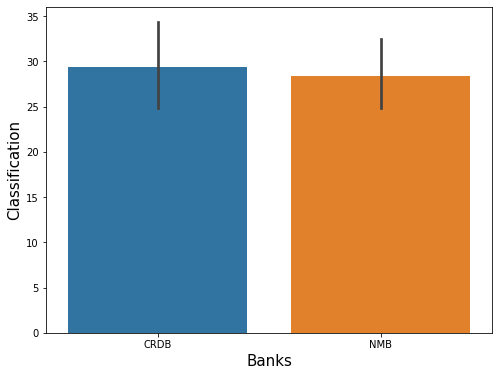

In [49]:
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Defining the plotsize
plt.figure(figsize=(8, 6))
 
# Defining the x-axis, the y-axis and the data
# from where the values are to be taken
plots = sns.barplot(x="Bank", y="Age", data=df)
 
# Setting the x-acis label and its size
plt.xlabel("Banks", size=15)
 
# Setting the y-axis label and its size
plt.ylabel("Classification", size=15)
 
# Finallt plotting the graph
plt.show()

#### Plotting

In [102]:
df2 = pd.crosstab(index=df['Bank'], columns=df['Classification'], values=df['Amount'], aggfunc=lambda x: (x.max() - x.min())/2)

df2

df

,Bank,Classification,Age,Amount
0,CRDB,Current,24,3424
1,CRDB,Current,28,54328
2,CRDB,Substandard,40,4034
3,CRDB,Substandard,22,34522
4,CRDB,Substandard,29,3529
5,CRDB,Loss,33,3433
6,NMB,ESM,31,34531
7,NMB,Loss,26,23556
8,NMB,Doubtful,21,2441
9,NMB,ESM,36,3356
